### CHEGADAS DE CLIENTES NO BANK98

O Bank98 opera uma agência principal e três filiais em uma cidade de médio porte. Todas as quatro unidades oferecem serviços semelhantes, e os clientes geralmente frequentam a unidade mais próxima. Recentemente, o banco tem enfrentado mais congestionamento — filas de espera mais longas — do que ele (ou seus clientes) gostaria. Como parte de um estudo para entender as causas dessas filas longas e sugerir possíveis soluções, todas as unidades registraram a quantidade de chegadas de clientes durante intervalos de uma hora ao longo das últimas 10 semanas. Todas as agências estão abertas de segunda a sexta-feira, das 9h às 17h, e aos sábados, das 9h ao meio-dia. Para cada unidade, o arquivo C03_01.xlsx contém o número de chegadas de clientes em cada hora durante o período de 10 semanas. O gerente do Bank98 contratou você para analisar esses dados. Especificamente, sua tarefa é apresentar gráficos e/ou tabelas que mostrem como o movimento de clientes nas agências varia conforme o dia da semana e a hora do dia.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('data/C03_01.xlsx',sheet_name='Data')

df.head(5)

,Day,Hour,Main,Branch1,Branch2,Branch3
0,Mon,9 to 10,29,20,20,18
1,Mon,10 to 11,26,13,13,12
2,Mon,11 to noon,57,28,26,29
3,Mon,Noon to 1,68,30,31,41
4,Mon,1 to 2,60,18,35,15


In [80]:
df['Total'] = df['Main'] + df['Branch1'] + df['Branch2'] + df['Branch3']

dict_hour = {
    '9 to 10': 9,
    '10 to 11': 10,
    '11 to noon': 11,
    'Noon to 1': 12,
    '1 to 2': 1,
    '2 to 3': 2,
    '3 to 4': 3,
    '4 to 5': 4
}

df['Start_Hour'] = df['Hour'].map(dict_hour)

df.head()

,Day,Hour,Main,Branch1,Branch2,Branch3,Total,Start_Hour
0,Mon,9 to 10,29,20,20,18,87,9
1,Mon,10 to 11,26,13,13,12,64,10
2,Mon,11 to noon,57,28,26,29,140,11
3,Mon,Noon to 1,68,30,31,41,170,12
4,Mon,1 to 2,60,18,35,15,128,1


### Qual a distruição de total clientes por hora?

/tmp/ipykernel_66081/332754915.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


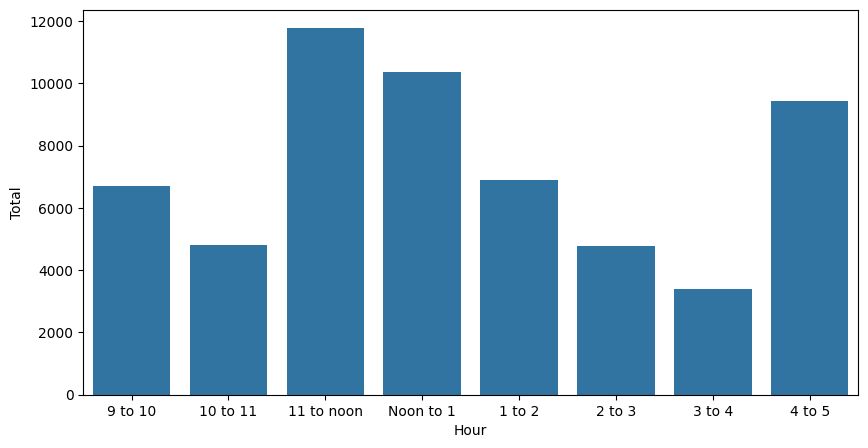

In [81]:
def ordering_hour(key):

    dict_hour = {
        '9 to 10': 1,
        '10 to 11': 2,
        '11 to noon': 3,
        'Noon to 1': 4,
        '1 to 2': 5,
        '2 to 3': 6,
        '3 to 4': 7,
        '4 to 5': 8
    }

    return key.map(dict_hour)

df_per_day = df.groupby('Hour',as_index=False)['Total'].sum().sort_values('Hour',key=ordering_hour)

fig = plt.figure(figsize=(10,5))

sns.barplot(df_per_day, x='Hour',y='Total')

fig.show()

### Qual a distruição de total clientes por dia?

/tmp/ipykernel_66081/2615772693.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


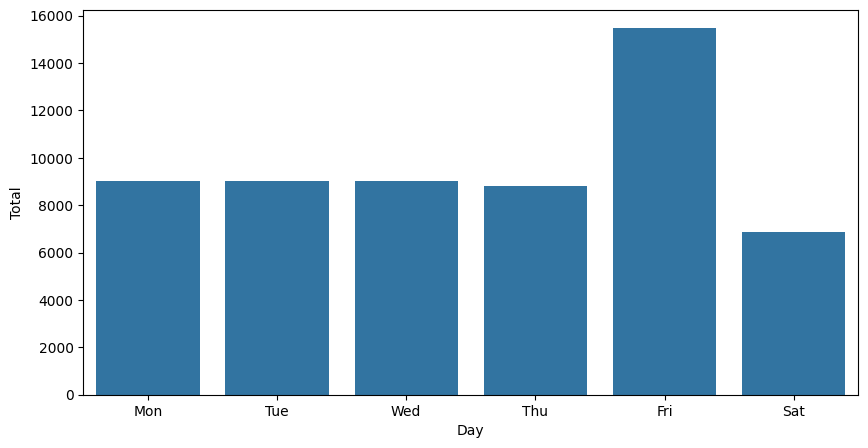

In [82]:
def ordering_day(key):

    dict_day = {
        'Mon': 1,
        'Tue': 2,
        'Wed': 3,
        'Thu': 4,
        'Fri': 5,
        'Sat': 6
    }

    return key.map(dict_day)

df_per_day = df.groupby('Day',as_index=False)['Total'].sum().sort_values('Day',key=ordering_day)

fig = plt.figure(figsize=(10,5))

sns.barplot(df_per_day, x='Day',y='Total')

fig.show()

### Qual a distruição de total clientes por dia normalizando por horas disponiveis?

/tmp/ipykernel_66081/3698823595.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


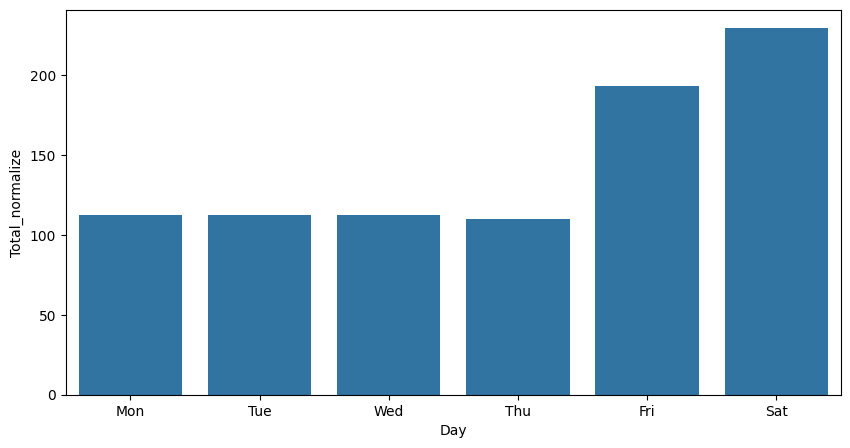

In [83]:
df_per_day = df.groupby('Day',as_index=False)['Total'].agg({'Total': 'sum','Hour': 'count'}).sort_values('Day',key=ordering_day)
df_per_day['Hour'] = df_per_day['Hour']

df_per_day['Total_normalize'] = df_per_day['Total']/df_per_day['Hour']

fig = plt.figure(figsize=(10,5))

sns.barplot(df_per_day, x='Day',y='Total_normalize')

fig.show()

### Qual a distribuição de clientes por hora em cada um dos dias em todas as filias?

/tmp/ipykernel_66081/1899946149.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


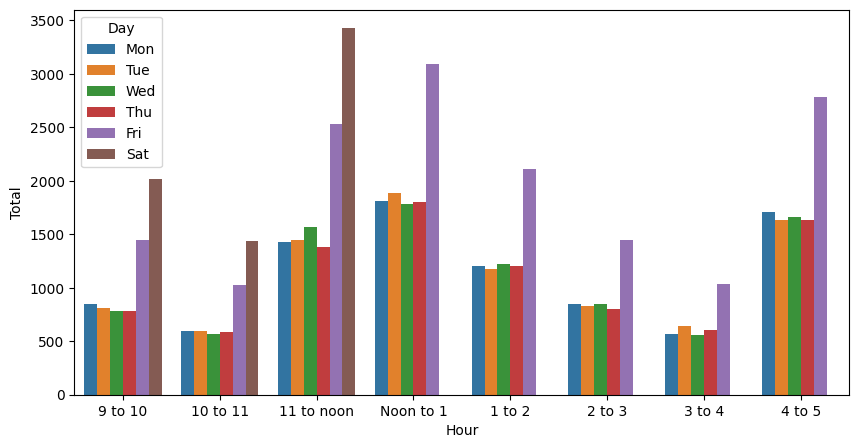

In [93]:
def ordering_custom(column, column_name):
    # dicionário para hora
    dict_hour = {
        '9 to 10': 1,
        '10 to 11': 2,
        '11 to noon': 3,
        'Noon to 1': 4,
        '1 to 2': 5,
        '2 to 3': 6,
        '3 to 4': 7,
        '4 to 5': 8
    }
    # dicionário para dia
    dict_day = {
        'Mon': 1,
        'Tue': 2,
        'Wed': 3,
        'Thu': 4,
        'Fri': 5,
        'Sat': 6,
        'Sun': 7
    }

    if column_name == 'Hour':
        return column.map(dict_hour)
    elif column_name == 'Day':
        return column.map(dict_day)
    else:
        return column

# Agora, use no sort_values assim:
df_per_hour_day = df.groupby(['Hour', 'Day'], as_index=False)['Total'].sum()\
    .sort_values(['Hour', 'Day'], 
                 key=lambda col: ordering_custom(col, col.name))


fig = plt.figure(figsize=(10,5))

sns.barplot(df_per_hour_day, x='Hour',y='Total',hue='Day')

fig.show()

### Qual a distribuição de clientes por hora para cada uma das filias?

/tmp/ipykernel_66081/3243140956.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


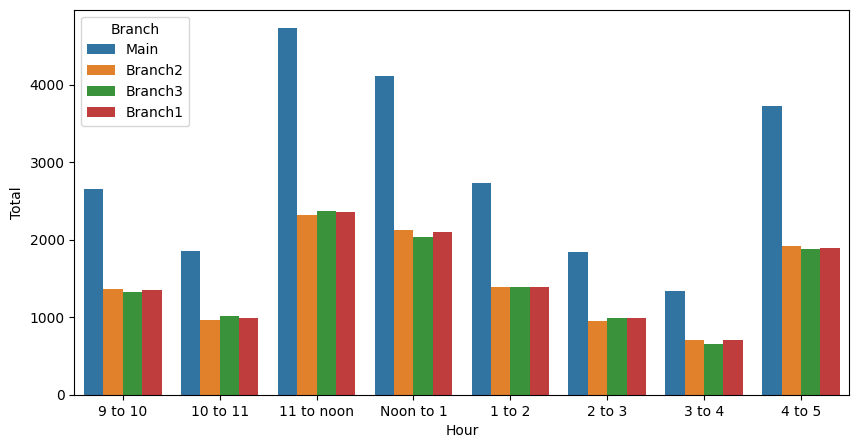

In [105]:
df_branchs = df.groupby('Hour',as_index=False)[['Main', 'Branch1', 'Branch2', 'Branch3']].sum()

df_branchs = df_branchs.melt(id_vars=['Hour'],value_vars=['Main','Branch1','Branch2','Branch3'],var_name='Branch',value_name='Total').sort_values('Hour',key=ordering_hour)

fig = plt.figure(figsize=(10,5))

sns.barplot(df_branchs, x='Hour',y='Total',hue='Branch')

fig.show()


### Qual a distribuição de clientes por dia para cada uma das filias?

/tmp/ipykernel_66081/3241147692.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


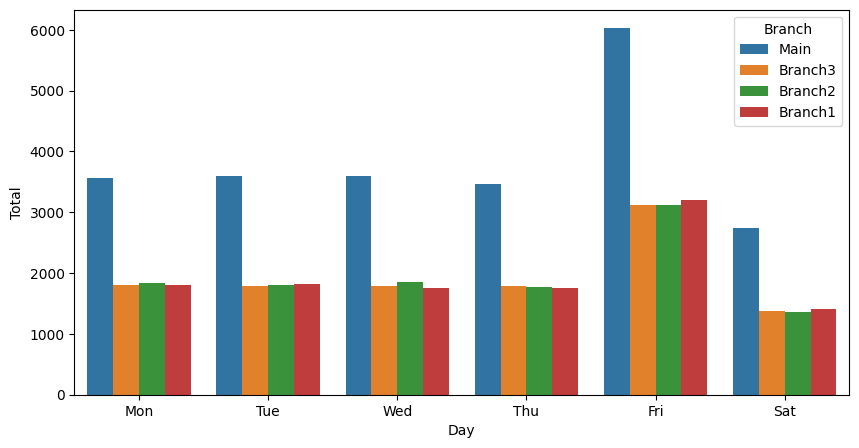

In [106]:
df_branchs = df.groupby('Day',as_index=False)[['Main', 'Branch1', 'Branch2', 'Branch3']].sum()

df_branchs = df_branchs.melt(id_vars=['Day'],value_vars=['Main','Branch1','Branch2','Branch3'],var_name='Branch',value_name='Total').sort_values('Day',key=ordering_day)

fig = plt.figure(figsize=(10,5))

sns.barplot(df_branchs, x='Day',y='Total',hue='Branch')

fig.show()
